In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("/content/h1n1_vaccine_prediction (3).csv")
data.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [3]:
data.shape

(26707, 34)

In [4]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [26]:
data['h1n1_worry'].unique()

array([ 1.,  3.,  2.,  0., nan])

In [27]:
data.dtypes.value_counts()

float64    23
object      9
int64       2
dtype: int64

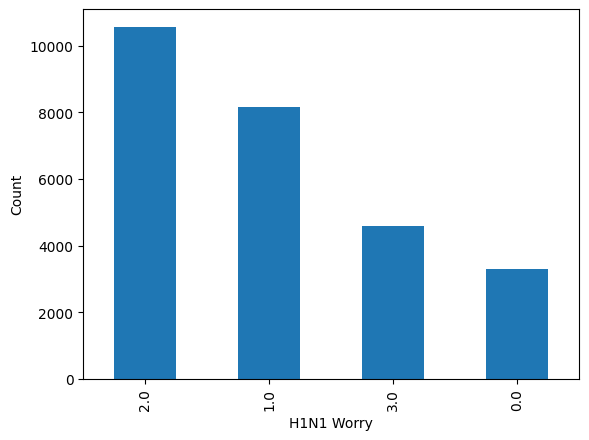

In [28]:
data['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()

<Axes: >

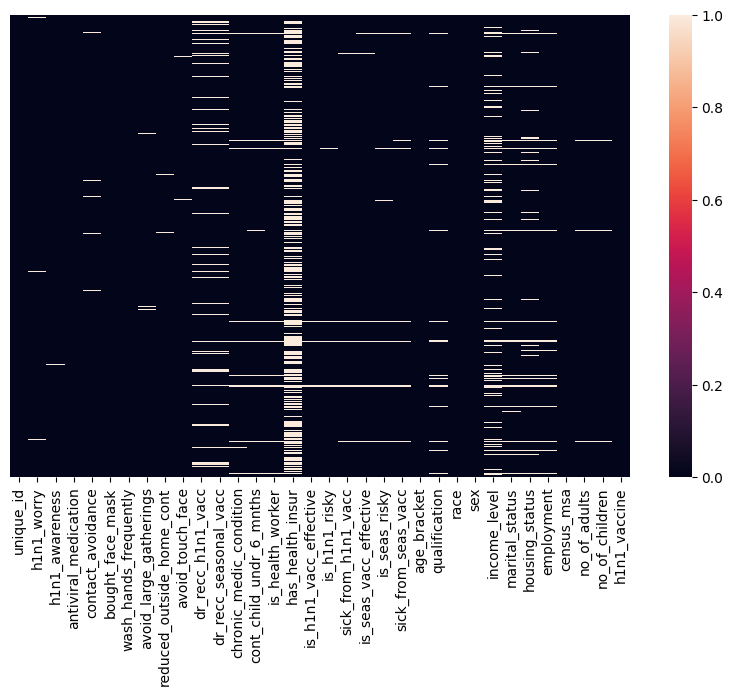

In [29]:
plt.figure(figsize=(10,6))
sb.heatmap(data.isnull(),yticklabels=False)

In [30]:
data['h1n1_worry'].fillna(data['h1n1_worry'].mode()[0], inplace = True)

In [31]:
data['h1n1_awareness'].unique()

array([ 0.,  2.,  1., nan])

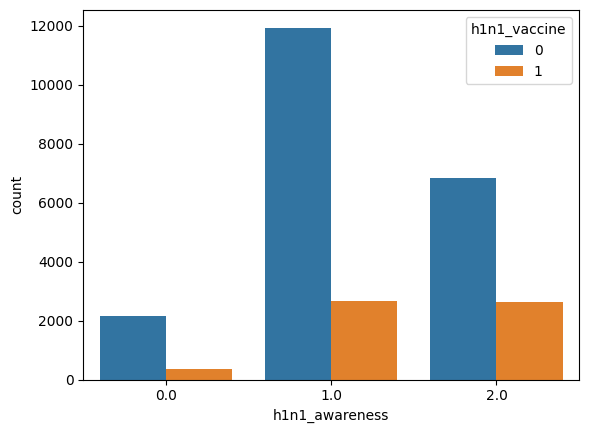

In [32]:
sb.countplot(x = 'h1n1_awareness', data = data, hue = 'h1n1_vaccine')
plt.show()

In [33]:
data['h1n1_awareness'].fillna(data['h1n1_awareness'].mode()[0], inplace = True)

In [34]:
data['antiviral_medication'].unique()

array([ 0.,  1., nan])

In [36]:
display(data['antiviral_medication'].mode())
data['antiviral_medication'].fillna(data['antiviral_medication'].mode()[0], inplace = True)

0    0.0
Name: antiviral_medication, dtype: float64

In [37]:
data['contact_avoidance'].unique()

array([ 0.,  1., nan])

In [40]:
data['contact_avoidance'].fillna(data['contact_avoidance'].mode()[0], inplace = True)

In [42]:
data['bought_face_mask'].unique()

array([ 0.,  1., nan])

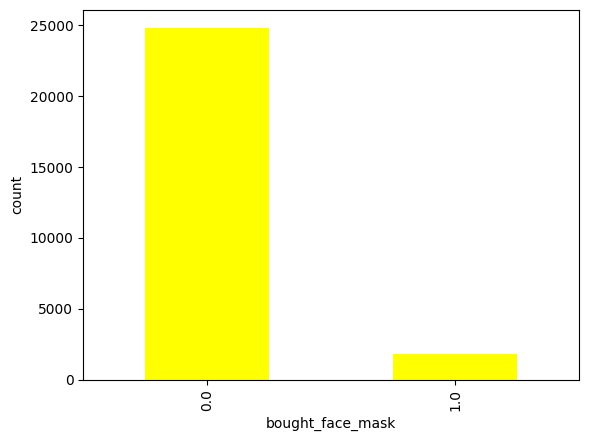

In [43]:
data['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'yellow')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

In [44]:
data['bought_face_mask'].fillna(data['bought_face_mask'].mode()[0], inplace = True)

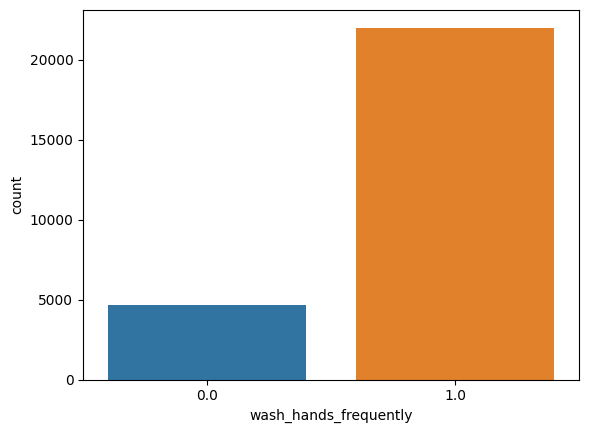

In [45]:
data['wash_hands_frequently'].unique()
sb.countplot(x = 'wash_hands_frequently', data = data)
plt.show()

In [47]:
data['wash_hands_frequently'].fillna(data['wash_hands_frequently'].mode()[0], inplace = True)
data['avoid_large_gatherings'].unique()
data['avoid_large_gatherings'].value_counts()
data['avoid_large_gatherings'].fillna(data['avoid_large_gatherings'].mode()[0], inplace = True)
data['reduced_outside_home_cont'].unique()
data['reduced_outside_home_cont'].value_counts()
data['reduced_outside_home_cont'].fillna(data['reduced_outside_home_cont'].mode()[0], inplace = True)
data['avoid_touch_face'].unique()
data['avoid_touch_face'].value_counts()
data['avoid_touch_face'].fillna(data['avoid_touch_face'].mode()[0], inplace = True)
display(data['dr_recc_h1n1_vacc'].unique(), data['dr_recc_seasonal_vacc'].unique())

array([ 0., nan,  1.])

array([ 0., nan,  1.])

<Axes: >

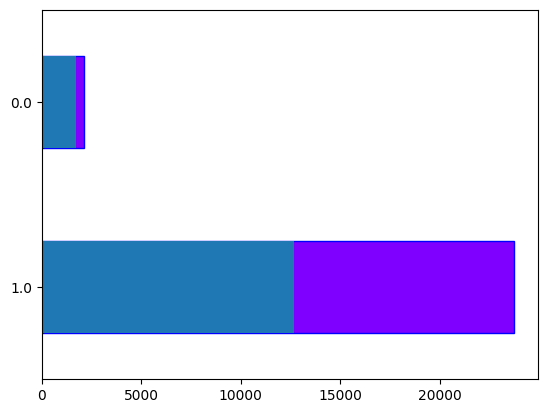

In [49]:
data['dr_recc_h1n1_vacc'].fillna(data['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
data['dr_recc_seasonal_vacc'].fillna(data['dr_recc_seasonal_vacc'].mode()[0], inplace = True)
data['chronic_medic_condition'].value_counts()
data['chronic_medic_condition'].fillna(data['chronic_medic_condition'].mode()[0], inplace = True)
data['cont_child_undr_6_mnths'].value_counts().plot(kind = 'barh', cmap = 'rainbow', edgecolor = 'b')
data['cont_child_undr_6_mnths'].fillna(data['cont_child_undr_6_mnths'].mode()[0], inplace = True)
data['is_health_worker'].value_counts()
data['is_health_worker'].fillna(data['is_health_worker'].mode()[0], inplace = True)
data['has_health_insur'].unique()
data['has_health_insur'].value_counts().plot(kind = 'barh')

In [75]:
data['has_health_insur'].fillna(2.0, inplace = True)


In [51]:
data['is_h1n1_vacc_effective'].fillna(data['is_h1n1_vacc_effective'].mode()[0], inplace = True)
data['is_seas_vacc_effective'].fillna(data['is_seas_vacc_effective'].mode()[0], inplace = True)
display(data['is_h1n1_risky'].unique(), data['is_seas_risky'].unique())


array([ 1.,  4.,  3.,  2.,  5., nan])

array([ 1.,  2.,  4.,  3.,  5., nan])

array([ 2.,  4.,  1.,  5.,  3., nan])

array([ 2.,  4.,  1.,  5., nan,  3.])

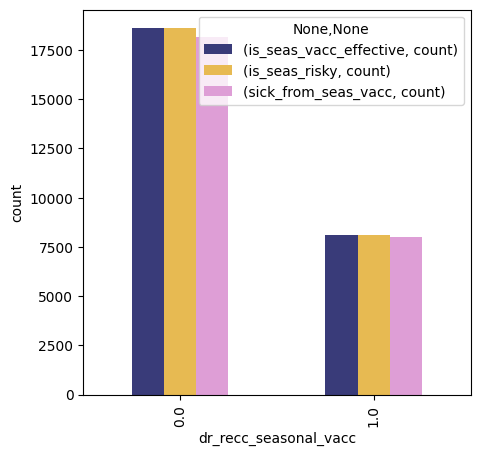

In [53]:
data['is_h1n1_risky'].fillna(data['is_h1n1_risky'].mode()[0], inplace = True)
data['is_seas_risky'].fillna(data['is_seas_risky'].mode()[0], inplace = True)
display(data['sick_from_h1n1_vacc'].unique(), data['sick_from_seas_vacc'].unique())
data.groupby(['dr_recc_seasonal_vacc']).agg({'is_seas_vacc_effective' : ['count'],
                                      'is_seas_risky' :['count'],
                                      'sick_from_seas_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [5,5])
plt.ylabel('count')
plt.show()

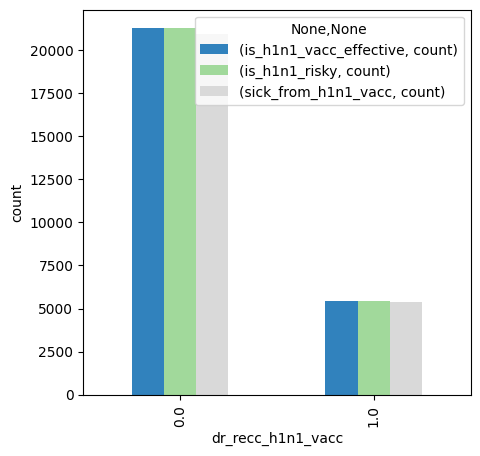

In [54]:
data.groupby(['dr_recc_h1n1_vacc']).agg({'is_h1n1_vacc_effective' : ['count'],
                                      'is_h1n1_risky' :['count'],
                                      'sick_from_h1n1_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20c', figsize = [5,5])
plt.ylabel('count')
plt.show()

In [56]:
data['qualification'].unique()



array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [57]:
data['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

<Axes: >

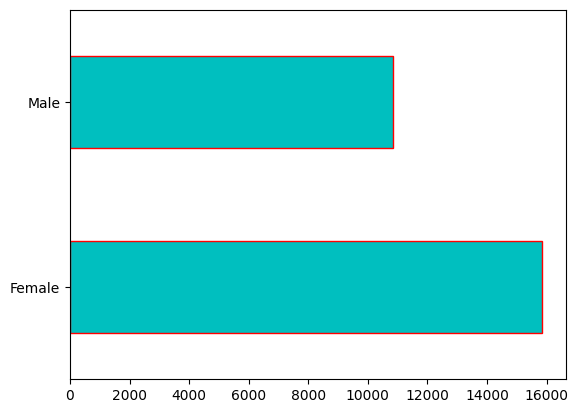

In [60]:
data['qualification'].fillna(data['qualification'].mode()[0], inplace = True)
data['sex'].value_counts().plot(kind = 'barh', color = 'c', edgecolor = 'r')

In [61]:
data['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

<Axes: ylabel='income_level'>

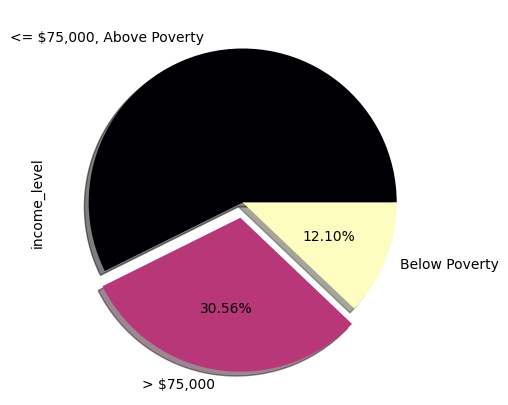

In [62]:
data['income_level'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', cmap = 'magma',
                                            explode = [0,0.1,0], figsize = [5,5], shadow = True)

In [64]:
data['income_level'].fillna('Unknown', inplace = True)
data['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [66]:
data['marital_status'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [68]:
data['marital_status'].fillna(data['marital_status'].mode()[0], inplace = True)

In [69]:
data['housing_status'].unique()

array(['Own', 'Rent', nan], dtype=object)

In [73]:
data['housing_status'].fillna(data['housing_status'].mode()[0], inplace = True)
data['employment'].unique()
data['employment'].fillna(data['employment'].mode()[0], inplace = True)
display(data['no_of_adults'].unique(), data['no_of_children'].unique())
data['no_of_adults'].fillna(data['no_of_adults'].mode()[0], inplace = True)
data['no_of_children'].fillna(data['no_of_children'].mode()[0], inplace = True)
data['sick_from_h1n1_vacc'].fillna(data['sick_from_h1n1_vacc'].mode()[0], inplace = True)
data['sick_from_seas_vacc'].fillna(data['sick_from_seas_vacc'].mode()[0], inplace = True)
data['age_bracket'].value_counts()

array([0., 2., 1., 3.])

array([0., 3., 2., 1.])

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [76]:
data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [85]:
vaccine1 = data.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
       'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
       'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
       'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
       'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
       'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
       'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
       'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
        'h1n1_vaccine' : str})
vaccine1.dtypes.value_counts()

object    33
int64      1
dtype: int64

In [86]:
vaccine_dummy = pd.get_dummies(vaccine1, drop_first= True )

In [87]:
vaccine_dummy.shape

(26707, 71)

In [88]:
vaccine_dummy['h1n1_vaccine_1'].value_counts(normalize = True)

0    0.787546
1    0.212454
Name: h1n1_vaccine_1, dtype: float64

In [89]:
y=vaccine_dummy['h1n1_vaccine_1']
x=vaccine_dummy.drop(['h1n1_vaccine_1'], axis=1)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [91]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
22,is_h1n1_vacc_effective_4.0,16.591642
34,is_seas_vacc_effective_4.0,13.580751
35,is_seas_vacc_effective_5.0,12.058868
53,race_White,11.029922
23,is_h1n1_vacc_effective_5.0,10.722771
...,...,...
61,employment_Unemployed,1.174879
16,cont_child_undr_6_mnths_1.0,1.131032
6,antiviral_medication_1.0,1.125755
29,sick_from_h1n1_vacc_3.0,1.094739


In [93]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=8)

In [94]:
log = LogisticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8410384423364953
Testing Score : 0.8434925864909391


In [95]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [101]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
cnfTrain=pd.DataFrame(confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,14977,803
Act_1,2381,1869


In [104]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15780
           1       0.70      0.44      0.54      4250

    accuracy                           0.84     20030
   macro avg       0.78      0.69      0.72     20030
weighted avg       0.83      0.84      0.83     20030



In [105]:
cnfTest=pd.DataFrame(confusion_matrix(y_test , pred_test), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTest

,Pred_0,Pred_1
Act_0,4998,255
Act_1,790,634


In [107]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      5253
           1       0.71      0.45      0.55      1424

    accuracy                           0.84      6677
   macro avg       0.79      0.70      0.73      6677
weighted avg       0.83      0.84      0.83      6677



In [108]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.446332,0.553668
1,0.880127,0.119873
2,0.566807,0.433193
3,0.962475,0.037525
4,0.869330,0.130670
...,...,...
20025,0.842883,0.157117
20026,0.204556,0.795444
20027,0.821422,0.178578
20028,0.883948,0.116052


In [109]:
x_train1=x_train.copy()

x_train1["Actual_Default"]=y_train
x_train1["Prob_Default"]=log.predict_proba(x_train)[:, 1]

x_train1

,unique_id,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,...,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,Actual_Default,Prob_Default
24359,24359,0,0,0,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,1,0.553668
6310,6310,1,0,0,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0.119873
9560,9560,1,0,0,1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0.433193
18823,18823,0,1,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0.037525
8598,8598,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0.130670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10376,10376,0,1,0,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0.157117
2181,2181,0,1,0,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0.795444
18417,18417,0,1,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0.178578
25940,25940,0,0,1,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0.116052
